## Cache Plots

In [17]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import seaborn as sns

PHYSICAL_CORES=64

def plot(p_data, p_yId, p_xId, p_hueId, p_styleId, p_logScale=False, p_core_marker=False):
    rcParams['figure.figsize'] = 11.7,8.27
    plot = sns.lineplot(x=p_xId,
                        y=p_yId,
                        hue=p_hueId,
                        style=p_styleId,
                        data=p_data)
    if p_logScale == True:
        plot.set_yscale('log')
        plot.set_xscale('log')
    plot.set(xlabel=p_xId, ylabel=p_yId)
    plt.grid(True,which="both",ls="--",c='lightgray') 

    if(p_core_marker == True):
        plt.axvline(64, linestyle='--', color='red')

    plt.figure(figsize=(1, 1), dpi=80)
    plt.show()

### Gauss3

#### Efficiency by Threads

    node_id                      bench_id scale                    impl_id  \
0    gauss3  e_efficiency_by_threads_weak  weak             linear_stencil   
2    gauss3  e_efficiency_by_threads_weak  weak             linear_stencil   
4    gauss3  e_efficiency_by_threads_weak  weak             linear_stencil   
6    gauss3  e_efficiency_by_threads_weak  weak             linear_stencil   
8    gauss3  e_efficiency_by_threads_weak  weak             linear_stencil   
..      ...                           ...   ...                        ...   
502  gauss3  e_efficiency_by_threads_weak  weak  linear_stencil_firsttouch   
504  gauss3  e_efficiency_by_threads_weak  weak  linear_stencil_firsttouch   
506  gauss3  e_efficiency_by_threads_weak  weak  linear_stencil_firsttouch   
508  gauss3  e_efficiency_by_threads_weak  weak  linear_stencil_firsttouch   
510  gauss3  e_efficiency_by_threads_weak  weak  linear_stencil_firsttouch   

    region_id  obj_cols  obj_rows  obj_levels  threads   runtim

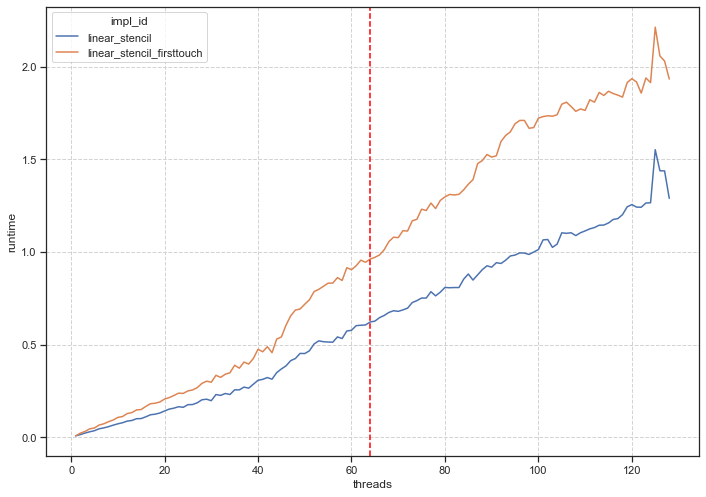

<Figure size 80x80 with 0 Axes>

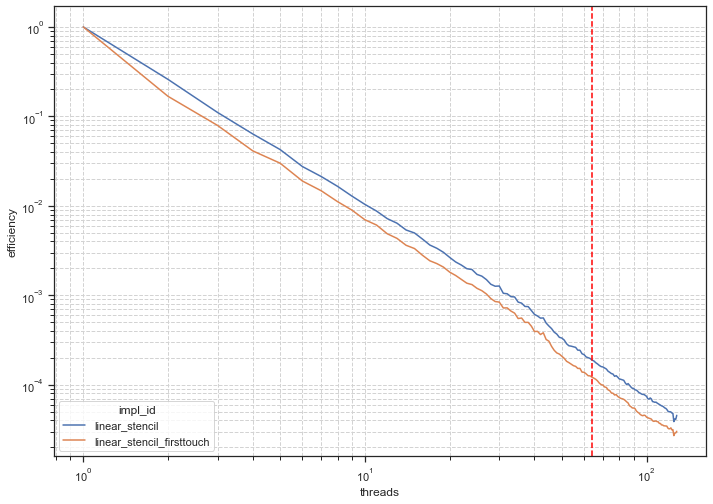

<Figure size 80x80 with 0 Axes>

In [18]:
import pandas as pd

sns.set_theme()
sns.set_style("ticks")

data_frame = pd.read_csv('./e_efficiency_by_threads_weak.csv')
data_frame = data_frame[data_frame.region_id == 'apply']

# #
# # NOTE: calc absolute efficiency
# #
# ref_runtime = data_frame[data_frame.bench_id == 'native'][data_frame.threads == 1]['runtime'].values[0]
# data_frame = data_frame.assign(efficiency_abs=lambda p_entry: ref_runtime/(p_entry.runtime * p_entry.threads))

print(data_frame)

plot(p_data=data_frame,
    p_yId='runtime',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=False,
    p_core_marker=True)
plot(p_data=data_frame,
    p_yId='efficiency',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_core_marker=True)